# Bộ lọc FIR sẽ được thiết kế để lọc 3 băng tần chính: Low, Mid, và High.

1. Xác định các Thông Số Bộ Lọc
- Tần số lấy mẫu (Sampling Frequency): 44100 Hz (chuẩn âm thanh).
- Băng tần:
    - Low: 20 - 200 Hz
    - Mid: 200 - 2000 Hz
    - High: 2000 - 20000 Hz
- Số taps: 101 (số lượng coefficients)

2. Lựa Chọn Cửa Sổ
- Chọn Hamming window để có đáp ứng tần số tốt mà vẫn đảm bảo mượt mà ở các biên độ.

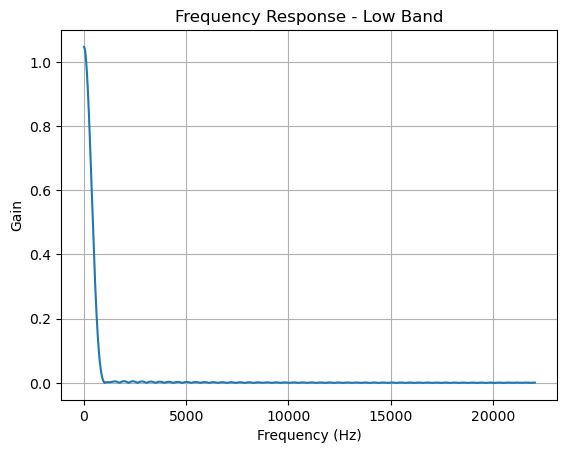

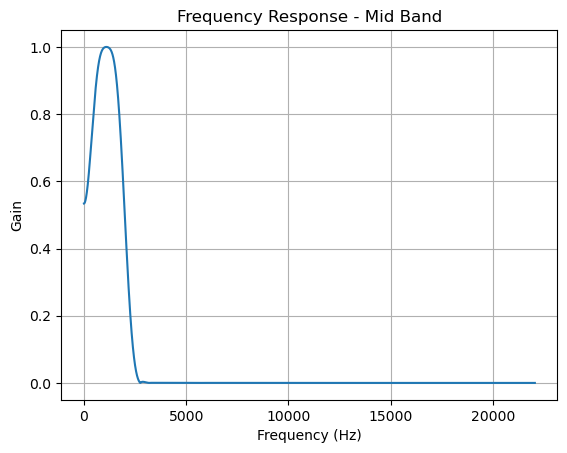

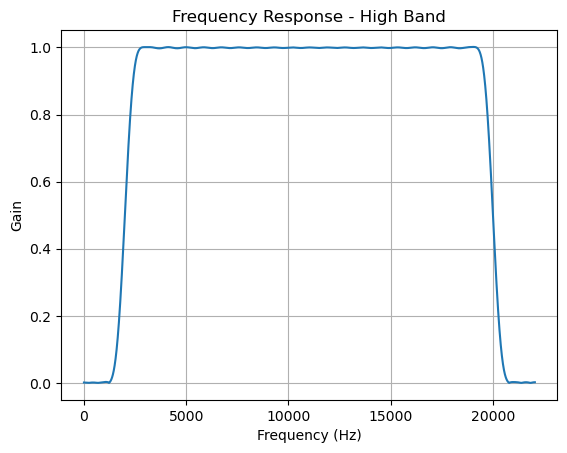

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

# 1. Đặt các tham số
fs = 44100  # Tần số lấy mẫu (Hz)
num_taps = 101  # Số lượng taps (số coefficients)

# 2. Tính toán tần số cắt cho từng băng tần (chuẩn hóa theo Nyquist)
nyquist = fs / 2
low_cutoff = [20 / nyquist, 200 / nyquist]  # Low band
mid_cutoff = [200 / nyquist, 2000 / nyquist]  # Mid band
high_cutoff = [2000 / nyquist, 20000 / nyquist]  # High band

# 3. Thiết kế bộ lọc FIR cho từng băng tần
low_band = firwin(num_taps, low_cutoff, pass_zero=False, window='hamming')  # Bộ lọc thông dải Low
mid_band = firwin(num_taps, mid_cutoff, pass_zero=False, window='hamming')  # Bộ lọc thông dải Mid
high_band = firwin(num_taps, high_cutoff, pass_zero=False, window='hamming')  # Bộ lọc thông dải High

# 4. Kiểm tra đáp ứng tần số của từng bộ lọc
def plot_frequency_response(coefficients, band_name):
    w, h = freqz(coefficients, worN=8000)
    plt.plot((w / np.pi) * nyquist, np.abs(h), label=f'{band_name} Band')
    plt.title(f'Frequency Response - {band_name} Band')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

plot_frequency_response(low_band, 'Low')
plot_frequency_response(mid_band, 'Mid')
plot_frequency_response(high_band, 'High')
    

## Áp Dụng Bộ Lọc vào Tín Hiệu Âm Thanh
Áp dụng các bộ lọc vào một tín hiệu âm thanh đầu vào, sử dụng hàm lfilter từ SciPy.

In [2]:
import soundfile as sf

# Đọc file âm thanh đầu vào (giả sử file có tên 'input.wav')
input_signal, fs = sf.read('input.wav')

# Lọc tín hiệu qua từng bộ lọc băng tần
low_filtered = lfilter(low_band, 1.0, input_signal)
mid_filtered = lfilter(mid_band, 1.0, input_signal)
high_filtered = lfilter(high_band, 1.0, input_signal)

# Kết hợp các tín hiệu đã lọc (có thể điều chỉnh độ lợi của từng băng tần tại đây)
output_signal = low_filtered + mid_filtered + high_filtered

# Ghi tín hiệu đã xử lý vào file output
sf.write('output.wav', output_signal, fs)
    

## Kết Hợp với Giao Diện Điều Khiển Equalizer
Nếu bạn muốn thay đổi Gain của từng băng tần (low, mid, high) từ giao diện người dùng, bạn có thể thêm các hệ số khuếch đại cho từng tín hiệu đã lọc:

In [3]:

# Các hệ số điều chỉnh độ lợi cho từng băng tần
gain_low = 1.0
gain_mid = 1.2
gain_high = 0.8

# Áp dụng độ lợi cho từng băng tần
output_signal = gain_low * low_filtered + gain_mid * mid_filtered + gain_high * high_filtered
sf.write('output_adjusted.wav', output_signal, fs)

    

## Kiểm Tra và Hiển Thị Đáp Ứng Tần Số Sau Khi Điều Chỉnh Gain
Khi điều chỉnh Gain, bạn có thể kiểm tra lại đáp ứng tần số tổng hợp để đảm bảo chất lượng.

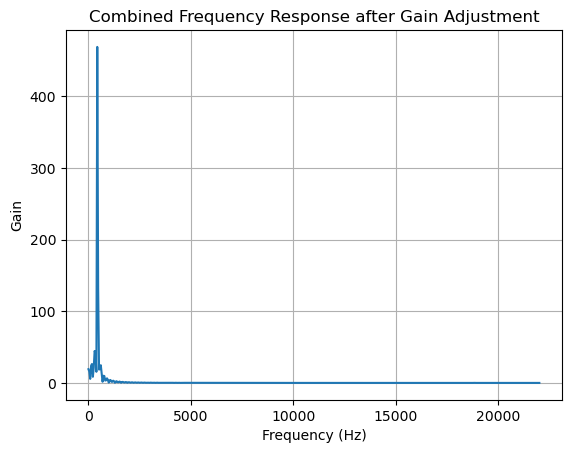

In [4]:

w, h = freqz(output_signal)
plt.plot((w / np.pi) * nyquist, np.abs(h))
plt.title('Combined Frequency Response after Gain Adjustment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()
    